In [1]:
import pandas as pd
import numpy as np

import math
import warnings
import string

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
import seaborn as sns

warnings.filterwarnings("ignore")


In [6]:
cardio = pd.read_csv('cardio_train.csv', sep=";")
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
print(f"Number of columns: { cardio.shape[1] }")

Number of columns: 13


In [8]:
print(f"Number of rows: { cardio.shape[0] }")

Number of rows: 70000


In [9]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [10]:
num_entries = cardio.shape[0]*cardio.shape[1]
print('Number of entries in the dataframe: ', num_entries)

num_missing_values = cardio.isna().sum().sum()
print('Missing values: ', num_missing_values, '\n')

cardio_dup = cardio.duplicated().sum()
if cardio_dup:
    print('Duplicates Rows in Dataset are : {}'.format(cardio_dup))
else:
    print('Dataset contains no Duplicate Values')

Number of entries in the dataframe:  910000
Missing values:  0 

Dataset contains no Duplicate Values


In [11]:
cardio.drop_duplicates(inplace=True)
cardio.drop(['id'], axis=1,inplace=True)

In [12]:
cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
cardio['age'] = cardio['age'].apply(lambda x: x/365) 

In [14]:
outliers = len(cardio[(cardio["ap_hi"]>=280) | (cardio["ap_lo"]>=220) | (cardio["ap_lo"] < 0) | (cardio["ap_hi"] < 0) | (cardio["ap_hi"]<cardio["ap_lo"])])

print(f'we have total {outliers} outliers')
print(f'percent missing: {round(outliers/len(cardio)*100,1)}%')

we have total 1275 outliers
percent missing: 1.8%


In [15]:
cardio = cardio[ (cardio['ap_lo'] >= 0) & (cardio['ap_hi'] >= 0) ] 
cardio = cardio[ (cardio['ap_lo'] <= 220) & (cardio['ap_hi'] <= 280) ] 
cardio = cardio[ (cardio['ap_lo'] < cardio['ap_hi']) ]

In [16]:
Q1_hi = cardio['ap_hi'].quantile(0.05) 
Q3_hi = cardio['ap_hi'].quantile(0.95)  
IQR_hi = Q3_hi - Q1_hi
lower, upper = Q1_hi - 1.5 * IQR_hi, Q3_hi + 1.5 * IQR_hi
cardio = cardio[(cardio['ap_hi'] >= lower) & (cardio['ap_hi'] <= upper)]  

Q1_lo = cardio['ap_lo'].quantile(0.05) 
Q3_lo = cardio['ap_lo'].quantile(0.95)  
IQR_lo = Q3_lo - Q1_lo
lower, upper = Q1_lo - 1.5 * IQR_lo, Q3_lo + 1.5 * IQR_lo
cardio = cardio[(cardio['ap_lo'] >= lower) & (cardio['ap_lo'] <= upper)] 

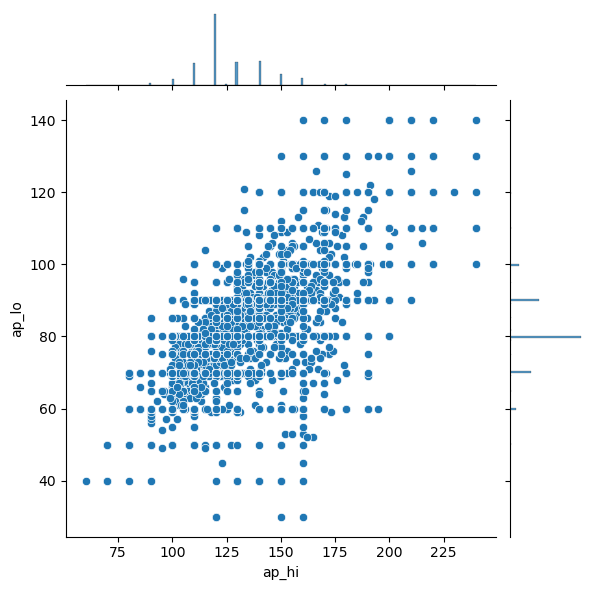

In [17]:
sns.jointplot(x='ap_hi', y='ap_lo', data=cardio);

<AxesSubplot:>

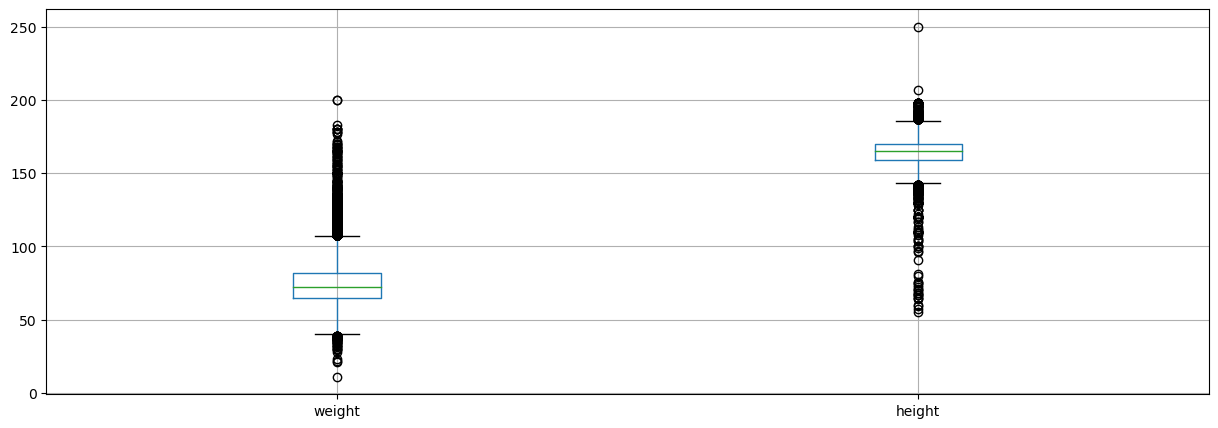

In [18]:
plt.figure(figsize=(15,5))
cardio.boxplot(['weight','height'])

In [19]:
len(cardio[(cardio['height'] > 251) | (cardio['height'] < 54)])

0

In [20]:
def detect_outliers(df,q1,q3):
    for col in df.columns:
    df_feature = df[col]
    Q1 = df_feature.quantile(q1)
    Q3 = df_feature.quantile(q3)  
    IQR = Q3 - Q1    
    print(f'Feature: {col}-------------')
    print(f'Percentiles: {int(q1*100)}th={Q1}, {int(q3*100)}th={Q3}, IQR={IQR}')
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = [x for x in df_feature if x < lower or x > upper]
    print('Identified outliers: %d \n' % len(outliers))
  
detect_outliers(cardio[['height', 'weight']],0.05,0.95)

Feature: height-------------
Percentiles: 5th=152.0, 95th=178.0, IQR=26.0
Identified outliers: 46 

Feature: weight-------------
Percentiles: 5th=55.0, 95th=100.0, IQR=45.0
Identified outliers: 20 



In [21]:
cardio_cleaned = cardio 
for col in ['height','weight']:
  Q1 = cardio[col].quantile(0.05) 
  Q3 = cardio[col].quantile(0.95)  
  IQR = Q3 - Q1
  lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
  cardio_cleaned = cardio_cleaned[(cardio_cleaned[col] >= lower) & (cardio_cleaned[col] <= upper)]  

In [22]:
cardio_cleaned['BMI'] = round(cardio_cleaned['weight']/((cardio_cleaned['height']/100)**2),1)
cardio_cleaned.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.0


In [23]:
cardio_cleaned = cardio_cleaned[ (cardio_cleaned['BMI'] < 60) & (cardio_cleaned['BMI'] > 10)]

In [24]:
print(f'Number of rows of cardio dataset after data preprocessing: {len(cardio_cleaned)}')
print(f'How much percent missing: {round((70000-len(cardio_cleaned))/70000*100,2)}%')

Number of rows of cardio dataset after data preprocessing: 68584
How much percent missing: 2.02%


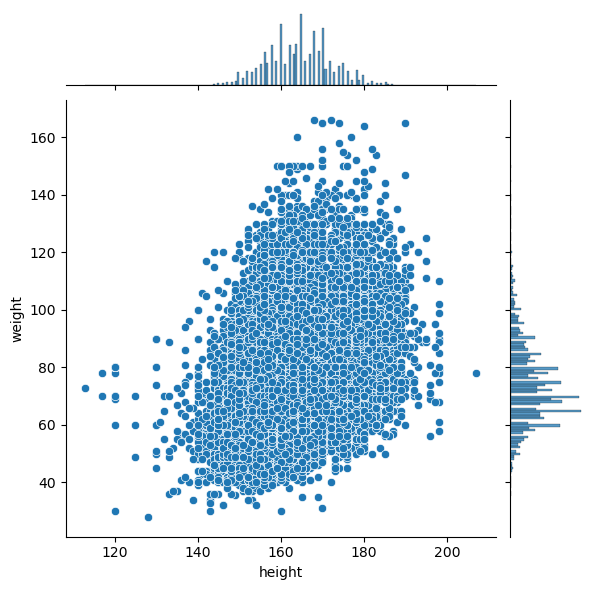

In [25]:
sns.jointplot(x='height', y='weight', data=cardio_cleaned);

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

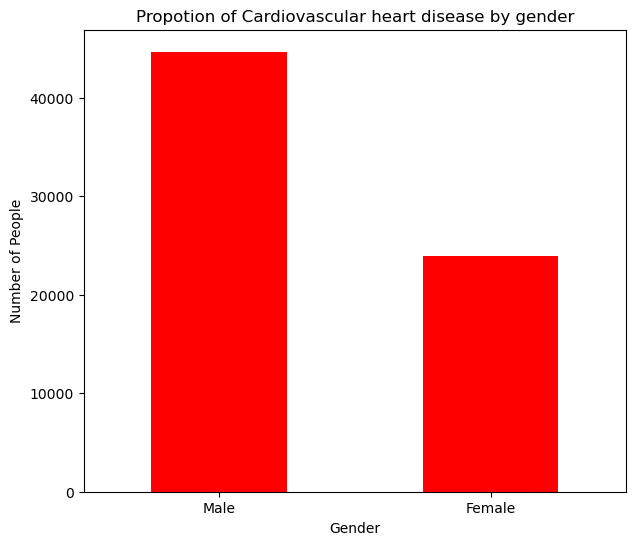

In [26]:
gender = cardio_cleaned['gender'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color="r")
ax.set_title("Propotion of Cardiovascular heart disease by gender", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Male', 'Female'))

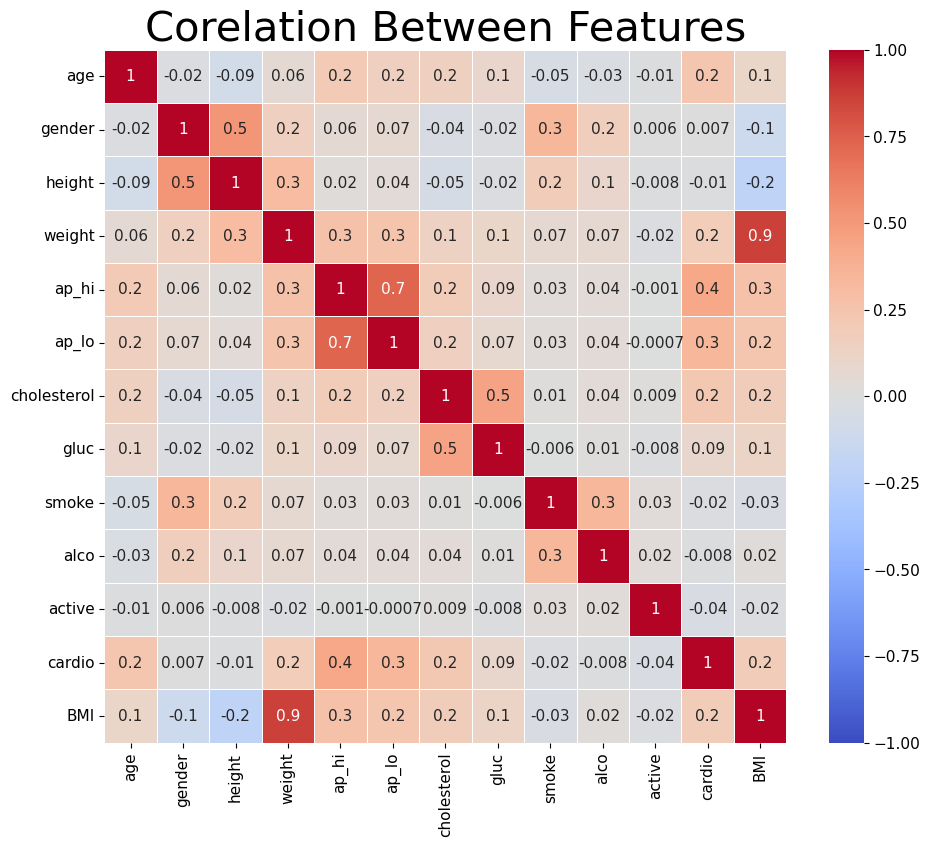

In [27]:
plt.rcParams.update({'font.size': 11})
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(cardio_cleaned.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax, fmt='.1g', linewidths=.5);
plt.title('Correlation Between Features', fontsize = 30)
plt.show()

In [28]:
cardio_scaled=cardio_cleaned.copy()

columns_to_scale = ['age', 'weight', 'ap_hi', 'ap_lo','cholesterol','gender','BMI','height']

scaler = StandardScaler()
cardio_scaled[columns_to_scale] = scaler.fit_transform(cardio_cleaned[columns_to_scale])

cardio_scaled.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,-0.434227,1.366947,0.453582,-0.853029,-0.999477,-0.137142,-0.537143,1,0,0,1,0,-1.047959
1,0.309323,-0.731557,-1.063527,0.772526,0.799796,0.923664,2.408948,1,0,0,1,1,1.437575
2,-0.246212,-0.731557,0.074304,-0.711677,0.200039,-1.197948,2.408948,1,0,0,0,1,-0.758943
3,-0.746234,1.366947,0.580007,0.560497,1.399554,1.984469,-0.537143,1,0,0,1,1,0.242977
4,-0.806609,-0.731557,-1.063527,-1.277087,-1.599234,-2.258753,-0.537143,1,0,0,0,0,-0.855282


In [29]:
cardio_scaled_mm=cardio_cleaned.copy()
columns_to_scale_mm = ['age', 'weight', 'ap_hi', 'ap_lo','cholesterol','gender','BMI','height']
mmscaler = MinMaxScaler()
cardio_scaled_mm[columns_to_scale_mm] = mmscaler.fit_transform(cardio_cleaned[columns_to_scale_mm])

cardio_scaled_mm.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0.588076,1.0,0.585106,0.246377,0.277778,0.454545,0.0,1,0,0,1,0,0.231557
1,0.730159,0.0,0.457447,0.413043,0.444444,0.545455,1.0,1,0,0,1,1,0.495902
2,0.624003,0.0,0.553191,0.260870,0.388889,0.363636,1.0,1,0,0,0,1,0.262295
3,0.528455,1.0,0.595745,0.391304,0.500000,0.636364,0.0,1,0,0,1,1,0.368852
4,0.516918,0.0,0.457447,0.202899,0.222222,0.272727,0.0,1,0,0,0,0,0.252049


In [31]:
X = cardio_cleaned.drop(['cardio'], axis=1)
y = cardio_cleaned['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

X_scaled = cardio_scaled.drop(['cardio'], axis=1) 
y_scaled = cardio_scaled['cardio']

X_scaled_mm = cardio_scaled_mm.drop(['cardio'], axis=1) 
y_scaled_mm = cardio_scaled_mm['cardio']

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle = True)
X_train_scaled_mm, X_test_scaled_mm, y_train_scaled_mm, y_test_scaled_mm = train_test_split(X_scaled_mm, y_scaled_mm, test_size=0.2, random_state=42, shuffle = True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)


X_train shape is  (54867, 12)
X_test shape is  (13717, 12)
y_train shape is  (54867,)
y_test shape is  (13717,)


The accuracy score is: 0.7301888167966757
Sensitivity (TPR) = 0.6749184702045656

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.71      0.78      0.75      6971
           1       0.75      0.67      0.71      6746

    accuracy                           0.73     13717
   macro avg       0.73      0.73      0.73     13717
weighted avg       0.73      0.73      0.73     13717



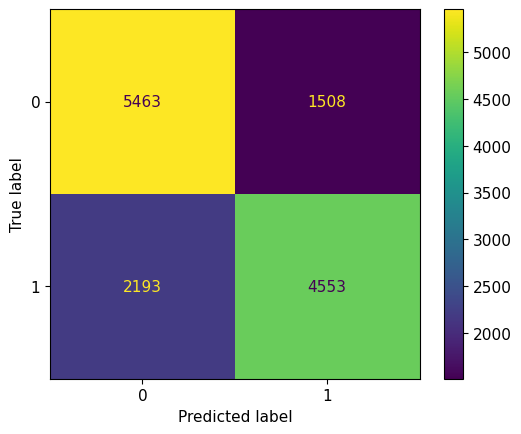

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

logreg_acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)  
tpr_logreg = cm[1][1] /(cm[1][0] + cm[1][1])

print('The accuracy score is:', logreg_acc) 
print('Sensitivity (TPR) =', tpr_logreg) 

print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred ))

plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

In [34]:
sfs = SequentialFeatureSelector(LogisticRegression(),
          direction='forward',
          scoring = 'accuracy',
          cv = 5,
          n_jobs=-1)

sfs.fit(X_train, y_train)
print("Features selected by forward sequential selection: " f"{sfs.get_feature_names_out()}")

Features selected by forward sequential selection: ['age' 'ap_hi' 'ap_lo' 'cholesterol' 'alco' 'active']


The accuracy score is: 0.7274914339870234
Sensitivity (TPR) = 0.6666172546694338

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6971
           1       0.75      0.67      0.71      6746

    accuracy                           0.73     13717
   macro avg       0.73      0.73      0.73     13717
weighted avg       0.73      0.73      0.73     13717



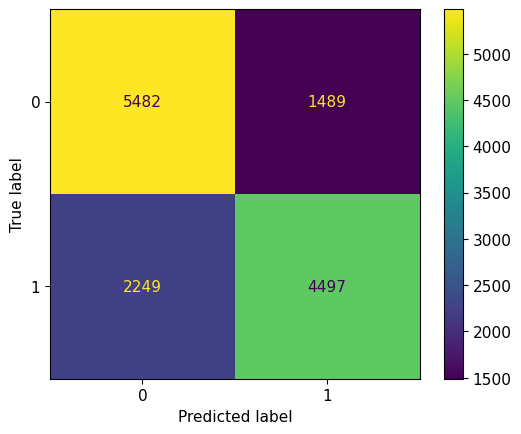

In [35]:
X_train_subset = X_train[sfs.get_feature_names_out()]
X_test_subset = X_test[sfs.get_feature_names_out()]

logreg_subset = LogisticRegression()
logreg_subset.fit(X_train_subset, y_train)
y_pred = logreg_subset.predict(X_test_subset)

logreg_acc_subset = accuracy_score(y_test, y_pred)
cm_subset = confusion_matrix(y_test, y_pred) 
tpr_logreg_subset = cm_subset[1][1] /(cm_subset[1][0] + cm_subset[1][1])

print('The accuracy score is:', logreg_acc_subset)
print('Sensitivity (TPR) =', tpr_logreg_subset)

print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred ))

plot_confusion_matrix(logreg_subset, X_test_subset, y_test)
plt.show()

In [36]:
parameters = {
     'penalty' : ['l1','l2'], 
     'C' : [0.001,0.01,0.1,1,10,100],
     }

tun_logreg = LogisticRegression()
clf_tun1 = GridSearchCV(tun_logreg,                    
                   param_grid = parameters,  
                   scoring='accuracy',        
                   cv=5,                      
                   verbose=3,
                   n_jobs=-1)                    

clf_tun1.fit(X_train,y_train)
print("Tuned Hyperparameters :", clf_tun1.best_params_)
print("Accuracy :",clf_tun1.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l2'}
Accuracy : 0.7257550389061568


Accuracy = 0.7267624116060363
Sensitivity (TPR) = 0.6666172546694338

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6971
           1       0.75      0.66      0.70      6746

    accuracy                           0.73     13717
   macro avg       0.73      0.73      0.73     13717
weighted avg       0.73      0.73      0.73     13717



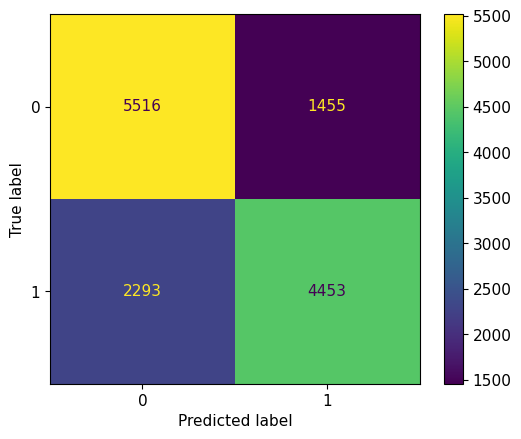

In [37]:
lda = LinearDiscriminantAnalysis(solver='lsqr', store_covariance=True)
lda.fit(X_train, y_train)

y_predicted = lda.predict(X_test)
y_predicted= np.array(y_predicted > 0.5, dtype=float)

lda_acc = accuracy_score(y_test, y_predicted)  
cm_lda = confusion_matrix(y_test, y_pred) 
tpr_lda = cm_lda[1][1] /(cm_lda[1][0] + cm_lda[1][1])

print('Accuracy =', lda_acc)  
print('Sensitivity (TPR) =', tpr_lda)

print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_predicted ))

plot_confusion_matrix(lda, X_test, y_test)
plt.show()

Accuracy: 0.6293650215061602
Sensitivity (TPR) = 0.6236288170767862

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.64      0.63      0.64      6971
           1       0.62      0.62      0.62      6746

    accuracy                           0.63     13717
   macro avg       0.63      0.63      0.63     13717
weighted avg       0.63      0.63      0.63     13717



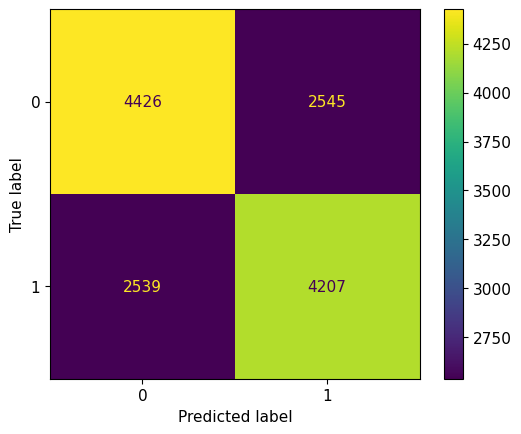

In [39]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

dtree_acc = accuracy_score(y_test, y_pred)   
cm_dtree = confusion_matrix(y_test, y_pred) 
tpr_dtree = cm_dtree[1][1] /(cm_dtree[1][0] + cm_dtree[1][1])

print("Accuracy:",dtree_acc)
print('Sensitivity (TPR) =', tpr_dtree)


print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred ))

plot_confusion_matrix(dtree, X_test, y_test)
plt.show()

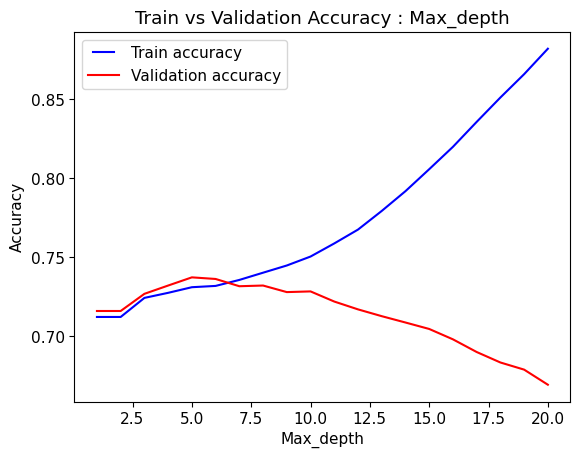

In [40]:
train_acc1 = []
val_acc1 = []

for max_d in range(1,21):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  train_acc1.append(model.score(X_train, y_train))
  val_acc1.append(model.score(X_test,y_test))

line1, = plt.plot([*range(1,21)], train_acc1, 'b', label='Train accuracy')
line2, = plt.plot([*range(1,21)], val_acc1, 'r', label='Validation accuracy')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('Train vs Validation Accuracy : Max_depth')
plt.ylabel('Accuracy')
plt.xlabel('Max_depth')
plt.show()

train_acc1.clear()
val_acc1.clear()

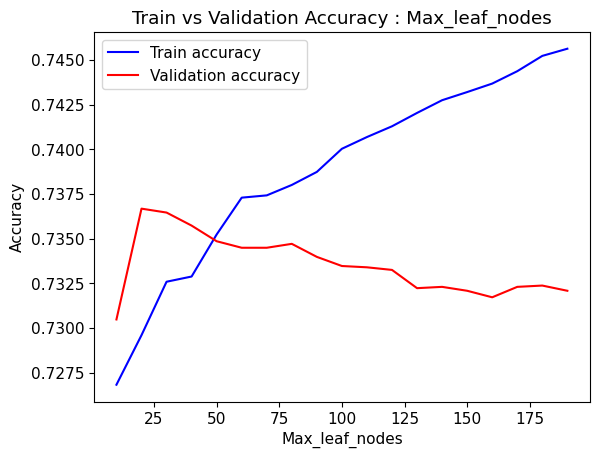

In [41]:
train_acc2 = []
val_acc2 = []

for max_ln in range(10,200,10):
  model2 = DecisionTreeClassifier(max_leaf_nodes=max_ln, random_state=42)
  model2.fit(X_train, y_train)
  train_acc2.append(model2.score(X_train, y_train))
  val_acc2.append(model2.score(X_test,y_test))


line3, = plt.plot([*range(10,200,10)], train_acc2, 'b', label='Train accuracy')
line4, = plt.plot([*range(10,200,10)], val_acc2, 'r', label='Validation accuracy')

plt.legend(handler_map={line2: HandlerLine2D(numpoints=2)})
plt.title('Train vs Validation Accuracy : Max_leaf_nodes')
plt.ylabel('Accuracy')
plt.xlabel('Max_leaf_nodes')
plt.show()

train_acc2.clear()
val_acc2.clear()

Accuracy: 0.7374061383684479
Sensitivity (TPR) = 0.681589089831011

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6971
           1       0.76      0.68      0.72      6746

    accuracy                           0.74     13717
   macro avg       0.74      0.74      0.74     13717
weighted avg       0.74      0.74      0.74     13717



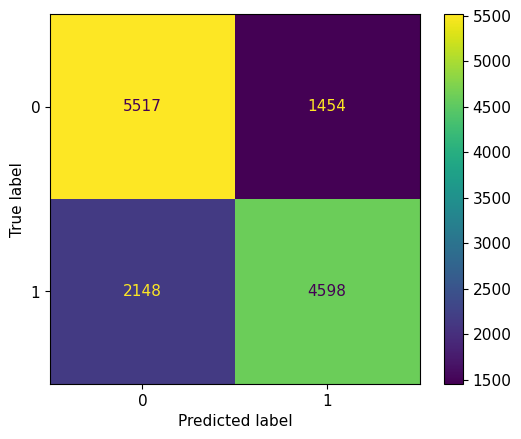

In [42]:
dtree_tuned = DecisionTreeClassifier(max_leaf_nodes=25,max_depth=5)

dtree_tuned.fit(X_train, y_train)

y_pred = dtree_tuned.predict(X_test)

dtree_tuned_acc = accuracy_score(y_test, y_pred)  
cm_dtree_tuned = confusion_matrix(y_test, y_pred) 
tpr_dree_tuned = cm_dtree_tuned[1][1] /(cm_dtree_tuned[1][0] + cm_dtree_tuned[1][1])

print("Accuracy:",dtree_tuned_acc)  
print('Sensitivity (TPR) =', tpr_dree_tuned)

print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred ))

plot_confusion_matrix(dtree_tuned, X_test, y_test)
plt.show()

Accuracy: 0.7364584092731646
Sensitivity (TPR) = 0.6950785650756004

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6971
           1       0.75      0.70      0.72      6746

    accuracy                           0.74     13717
   macro avg       0.74      0.74      0.74     13717
weighted avg       0.74      0.74      0.74     13717



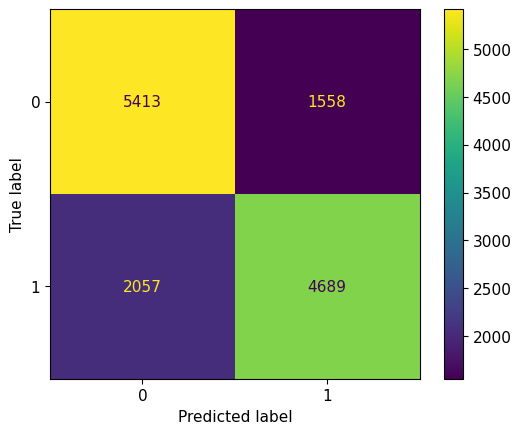

In [43]:
booster = GradientBoostingClassifier(max_depth=7,n_estimators=50,min_samples_split=1400,min_samples_leaf=60,max_features=7,subsample=0.85)
boost_est = booster.fit(X_train, y_train)

y_pred = boost_est.predict(X_test)

boosting_acc = accuracy_score(y_test, y_pred) 
cm_bossting = confusion_matrix(y_test, y_pred)  
tpr_boost = cm_bossting[1][1] /(cm_bossting[1][0] + cm_bossting[1][1]) 

print('Accuracy:', boosting_acc)
print('Sensitivity (TPR) =', tpr_boost)

print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred ))

plot_confusion_matrix(boost_est, X_test, y_test)
plt.show()

In [44]:
model = GradientBoostingClassifier()

n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print("%0.5f accuracy with a standard deviation of %0.2f" % (n_scores.mean(), n_scores.std()))

0.73377 accuracy with a standard deviation of 0.00


In [45]:
classifiers = []
nb_neighbor = [1, 5, 10, 20, 30, 40, 50]
for i in range(len(nb_neighbor)):
    classifiers.append(KNeighborsClassifier(nb_neighbor[i]))

score_list = []
true_positive = []
true_negative = []

index = 0
for clf in classifiers: 
    clf.fit(X_train,y_train)

    score = clf.score(X_test, y_test)    
    y_pred = clf.predict(X_test)
    
    print(f"Accuracy for K =", nb_neighbor[index] ,"nearest Neighbors: ",  accuracy_score(y_test, y_pred))

    
    cm = confusion_matrix(y_test, y_pred) # Confusion matrix  

    score_list.append(score)
    true_positive.append(cm[1][1])
    true_negative.append(cm[0][0])
    
    index = index + 1

Accuracy for K = 1 nearest Neighbors:  0.6324998177444048
Accuracy for K = 5 nearest Neighbors:  0.686155864985055
Accuracy for K = 10 nearest Neighbors:  0.7071517095574834
Accuracy for K = 20 nearest Neighbors:  0.7149522490340453
Accuracy for K = 30 nearest Neighbors:  0.7191076766056718
Accuracy for K = 40 nearest Neighbors:  0.7224611795582124
Accuracy for K = 50 nearest Neighbors:  0.7234089086534956


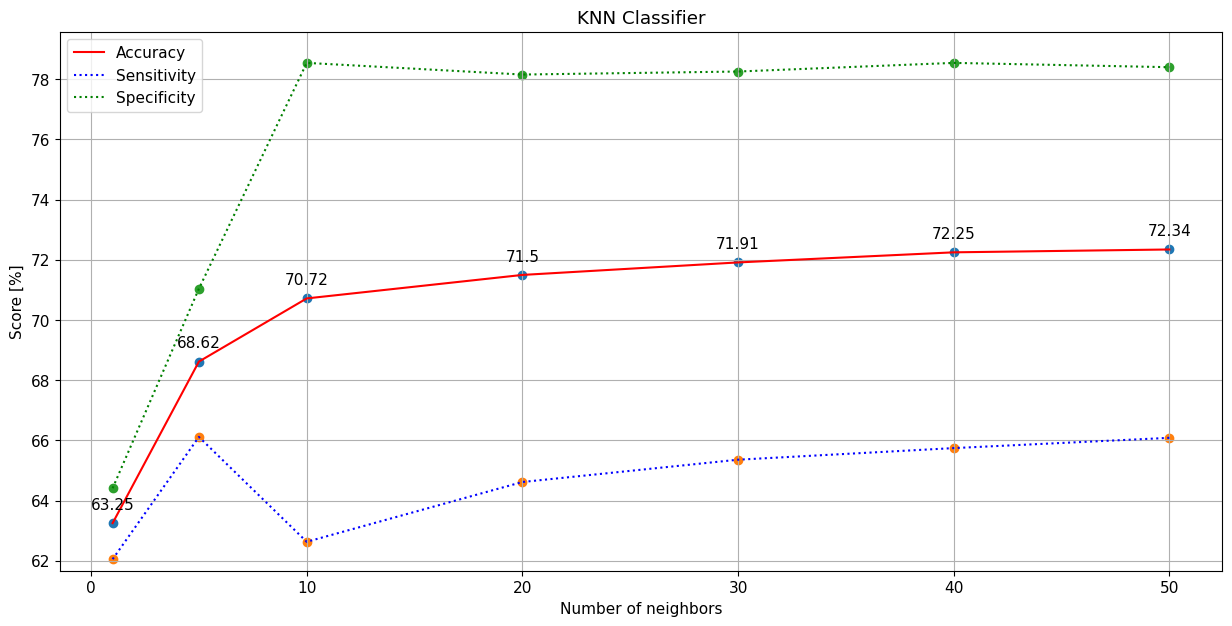

In [46]:
plt.figure(figsize=(15, 7))
ax = ax
score_list = np.array(score_list)
score_list_plot = score_list * 100
true_positive_plot = np.array(true_positive)/sum(y_test) * 100
true_negative_plot = np.array(true_negative)/(len(y_test)-sum(y_test)) * 100
plt.plot(nb_neighbor, score_list_plot,  'r-')
plt.plot(nb_neighbor, true_positive_plot, 'b:')
plt.plot(nb_neighbor, true_negative_plot, 'g:')
plt.scatter(nb_neighbor, score_list_plot)
plt.scatter(nb_neighbor, true_positive_plot)
plt.scatter(nb_neighbor, true_negative_plot)
for x,y in zip(nb_neighbor,score_list_plot):

    label = "{:.2f}".format(y)
    
    plt.annotate(str(round(y, 2)), 
                 (x,y), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.ylim(min(score_list_plot)* 0.975, max(score_list_plot)*1.1)
plt.xlabel('Number of neighbors')
plt.ylabel('Score [%]')
plt.title('KNN Classifier')
plt.legend(['Accuracy', 'Sensitivity', 'Specificity'])
plt.grid(True)
plt.show()
    


In [47]:
max_score = max(score_list)
max_index = np.argmax(score_list)
def get_base_acc(y):
    predictions = [np.median(y)] * len(y)
    return accuracy_score(y, predictions)


def k_fold_acc(X, y, classifier, kfold):
    scores = cross_validate(classifier, X, y, scoring = 'accuracy', cv = kfold)
    return np.mean(scores['test_score']) 
max_nb_neighbor = nb_neighbor[max_index]


max_score_temp = max_score
opt_temp_classifier = KNeighborsClassifier(max_nb_neighbor)

print(f'The highest accuracy of:', round(max_score,4)*100, '% is achieved when considering', max_nb_neighbor, 'Neighbors')def get_base_acc(y): # Calculating the base accuracy (using the median)
    predictions = [np.median(y)] * len(y)
    return accuracy_score(y, predictions)


def k_fold_acc(X, y, classifier, kfold): # Performing a k-fold cross validation (k=5)
    scores = cross_validate(classifier, X, y, scoring = 'accuracy', cv = kfold)
    return np.mean(scores['test_score']) 

The highest accuracy of: 72.34 % is achieved when considering 50 Neighbors


In [49]:
all_features = cardio_scaled_mm.columns
all_features = all_features.drop(['cardio'])

corr_list = cardio_scaled_mm.corrwith(cardio_scaled_mm['cardio'])
corr_list.drop(['cardio'], inplace = True)
for column in all_features:
    X_scaled_mm[column] = X_scaled_mm[column] * np.abs(corr_list[column])

label_column = 'cardio'
feature_columns = [c for c in cardio_cleaned.columns if c != label_column]

clf_KNN_BSS = KNeighborsClassifier(max_nb_neighbor)
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [50]:
def get_base_acc(y): 
    predictions = [np.median(y)] * len(y)
    return accuracy_score(y, predictions)


def k_fold_acc(X, y, classifier, kfold): 
    scores = cross_validate(classifier, X, y, scoring = 'accuracy', cv = kfold)
    return np.mean(scores['test_score']) 

In [51]:
def backward_stepwise_selection(X, y, classifier, kfold, all_features): 
    current_acc = k_fold_acc(X, y, classifier, kfold)

    current_features = np.arange(len(feature_columns)) 
    
    best_acc = current_acc
    best_features = current_features[:]
    
    while len(current_features) > 0:
        non_selected_feature = None
        for feature in current_features:
            new_features = np.delete(current_features, np.where(current_features == feature))
            acc = k_fold_acc(X[all_features[new_features]], y, classifier, kfold)
            if acc > current_acc:
                non_selected_feature = feature
                current_acc = acc
        if non_selected_feature is not None:
            current_features = np.delete(current_features, np.where(current_features == non_selected_feature))
        else:
            break
    if current_acc > get_base_acc(y):
        return current_features, current_acc
    else:
        return [], get_base_acc(y)
    

In [ ]:
features, accuracy = backward_stepwise_selection(X_scaled_mm, y_scaled_mm, clf_KNN_BSS, kfold, all_features)

In [56]:
all_features = cardio_cleaned.columns
all_features = all_features.drop(['cardio'])
print("Selected features:")
for idx in sorted(features):
    print(f"\t{all_features[idx]}")

print("Features left out:")
for idx in (set(range(len(feature_columns))) - set(features)):
    print(f"\t{all_features[idx]}")
    
print(f"Accuracy of the selected model: {accuracy:.3f}")

Selected features:
	age
	gender
	height
	ap_hi
	ap_lo
	cholesterol
	gluc
	smoke
	active
	BMI
Features left out:
	alco
	weight
Accuracy of the selected model: 0.731


Accuracy for K = 1 nearest Neighbors:  0.6386236057446963
Accuracy for K = 10 nearest Neighbors:  0.7178683385579937
Accuracy for K = 25 nearest Neighbors:  0.728366260844208
Accuracy for K = 50 nearest Neighbors:  0.7329591018444266
Accuracy for K = 100 nearest Neighbors:  0.734125537654006
Accuracy for K = 150 nearest Neighbors:  0.7357293868921776
Accuracy for K = 200 nearest Neighbors:  0.7366771159874608
Accuracy for K = 250 nearest Neighbors:  0.7359480936064737
Accuracy for K = 300 nearest Neighbors:  0.7356564846540788
Accuracy for K = 350 nearest Neighbors:  0.7350003645111904
Accuracy for K = 400 nearest Neighbors:  0.7360938980826711
Accuracy for K = 450 nearest Neighbors:  0.736385507035066
Accuracy for K = 500 nearest Neighbors:  0.7357293868921776


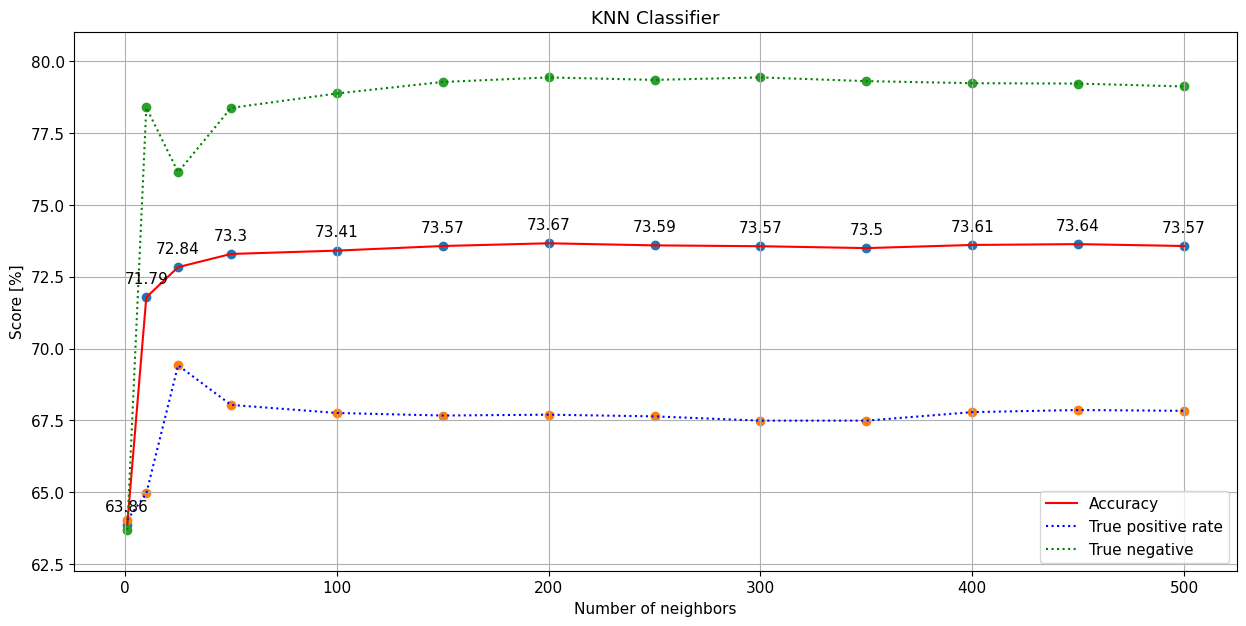

In [57]:
classifiers = []
nb_neighbor = [1, 10, 25, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for i in range(len(nb_neighbor)):
    classifiers.append(KNeighborsClassifier(n_neighbors = nb_neighbor[i]))


# Only using the selected features
cardio_selected = cardio_cleaned.copy()
features_selected = [feature_columns[feature_i] for feature_i in range(len(feature_columns)) if feature_i in features]

X_KNN = X_scaled_mm[features_selected]
y_KNN = y_scaled_mm

X_KNN_train, X_KNN_test, y_KNN_train, y_KNN_test = train_test_split(X_KNN, y_KNN, test_size=0.2, random_state=42, shuffle = True)
accuracy_KNN = []
true_positive_KNN = []
true_negative_KNN = []
index = 0
for clf in classifiers: 
    clf.fit(X_KNN_train,y_KNN_train)

    score = clf.score(X_KNN_test, y_KNN_test)    
    y_KNN_pred = clf.predict(X_KNN_test)
    
    print(f"Accuracy for K =", nb_neighbor[index] ,"nearest Neighbors: ",  accuracy_score(y_KNN_test, y_KNN_pred))

    
    cm = confusion_matrix(y_KNN_test, y_KNN_pred) # Confusion matrix  

    accuracy_KNN.append(score)
    true_positive_KNN.append(cm[1][1])
    true_negative_KNN.append(cm[0][0])
    
    index = index + 1
plt.figure(figsize=(15, 7))
ax = ax
accuracy_KNN = np.array(accuracy_KNN)
score_list_plot = accuracy_KNN * 100
true_positive_plot = np.array(true_positive_KNN)/sum(y_test) * 100
true_negative_plot = np.array(true_negative_KNN)/(len(y_test)-sum(y_test)) * 100
plt.plot(nb_neighbor, score_list_plot,  'r-')
plt.plot(nb_neighbor, true_positive_plot, 'b:')
plt.plot(nb_neighbor, true_negative_plot, 'g:')
plt.scatter(nb_neighbor, score_list_plot)
plt.scatter(nb_neighbor, true_positive_plot)
plt.scatter(nb_neighbor, true_negative_plot)
for x,y in zip(nb_neighbor,score_list_plot):

    label = "{:.2f}".format(y)

    plt.annotate(str(round(y, 2)), # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

plt.ylim(min(score_list_plot)* 0.975, max(score_list_plot)*1.1)
plt.xlabel('Number of neighbors')
plt.ylabel('Score [%]')
plt.title('KNN Classifier')
plt.legend(['Accuracy', 'True positive rate', 'True negative'])
plt.grid(True)
plt.show()



In [ ]:
max_score = max(accuracy_KNN)
max_index = np.argmax(accuracy_KNN)

n_neighbor_opt = nb_neighbor[max_index]

opt_classifier_KNN = KNeighborsClassifier(n_neighbor_opt)
best_model = opt_classifier_KNN.fit(X_KNN_train,y_KNN_train)
y_KNN_pred = opt_classifier_KNN.predict(X_KNN_test)

 
cm_KNN = confusion_matrix(y_KNN_test, y_KNN_pred) # Confusion matrix  
true_positive_KNN = cm_KNN[1][1]/sum(y_test)
accuracy_KNN = accuracy_score(y_KNN_test, y_KNN_pred)
print('Accuracy =', accuracy_KNN)  
print('True positive rate =', cm_KNN[1][1]/sum(y_test))  

print('\n Confusion matrix \n \n')
print(classification_report(y_KNN_test, y_KNN_pred))

plot_confusion_matrix(opt_classifier_KNN, X_KNN_test, y_KNN_test)
plt.show()

Accuracy = 0.6991324633666254
Sensitivity (TPR) = 0.5887933590275719

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.67      0.81      0.73      6971
           1       0.75      0.59      0.66      6746

    accuracy                           0.70     13717
   macro avg       0.71      0.70      0.69     13717
weighted avg       0.71      0.70      0.70     13717



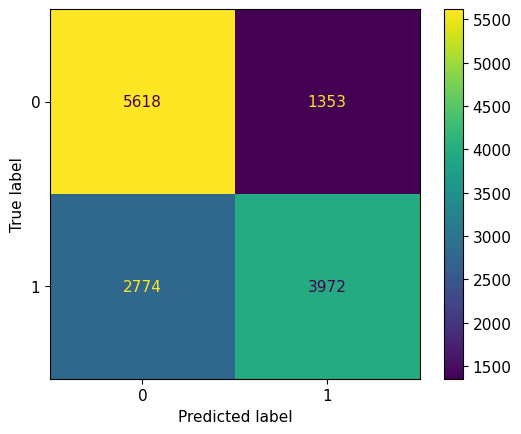

In [59]:
qdaClassifier = QuadraticDiscriminantAnalysis(store_covariance=True)
qdaClassifier.fit(X_train,y_train)
#get predictions
y_predict = qdaClassifier.predict(X_test)
y_predicted= np.array(y_predict > 0.5, dtype=float)
#get evaluation criteria
qda_acc = accuracy_score(y_test, y_predicted) 
qda_cm = confusion_matrix(y_test, y_predicted)
qda_tpr = qda_cm[1][1] /(qda_cm[1][0] + qda_cm[1][1])
print('Accuracy =', qda_acc)
print('Sensitivity (TPR) =', qda_tpr)

print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_predicted ))

plot_confusion_matrix(qdaClassifier, X_test, y_test)
plt.show()

In [60]:
resFSS = {}
for i in range(1,len(X_train.columns)):
    #define and fit classifier for different feature selections
    qdaClassifierFSS = SequentialFeatureSelector(QuadraticDiscriminantAnalysis(store_covariance=True),n_features_to_select=i, direction='forward')
    qdaClassifierFSS.fit(X_train,y_train)
    redu = qdaClassifierFSS.get_support()

    clms = []
    for idx,val in enumerate(X_train.columns):
        if redu[idx]:
            clms.append(val)

    X_trainFSS = pd.DataFrame(qdaClassifierFSS.transform(X_train),columns=clms)
    X_testFSS = pd.DataFrame(qdaClassifierFSS.transform(X_test),columns=clms)
    qdaClassifierFSS = QuadraticDiscriminantAnalysis(store_covariance=True)
    qdaClassifierFSS.fit(X_trainFSS,y_train)
    #get predictions
    y_predict = qdaClassifierFSS.predict(X_testFSS)
    y_predicted= np.array(y_predict > 0.5, dtype=float)
    #get evaluation criteria
    qdaFSS_acc = accuracy_score(y_test, y_predicted)
    qdaFSS_cm = confusion_matrix(y_test, y_predicted)
    qdaFSS_tpr = qda_cm[1][1] /(qda_cm[1][0] + qda_cm[1][1])
    qdaFSS_report = classification_report(y_test, y_predicted)
    resFSS[str(clms)] = ([qdaFSS_acc, qdaFSS_report, qdaClassifierFSS, X_testFSS, y_test, qdaFSS_tpr])

In [61]:
scores = []
for i in range(len(resFSS.values())):
    scores.append(list(resFSS.values())[i][0])
bestRes = max(scores)
idx = scores.index(bestRes)

selected_subset = list(resFSS.keys())[idx]
qdaFSS_results = list(resFSS.values())[idx]

print(selected_subset)

['age', 'gender', 'height', 'ap_hi', 'cholesterol', 'active']


Accuracy = 0.7199096012247576
Sensitivity (TPR) = 0.5887933590275719

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.69      0.83      0.75      6971
           1       0.77      0.61      0.68      6746

    accuracy                           0.72     13717
   macro avg       0.73      0.72      0.72     13717
weighted avg       0.73      0.72      0.72     13717



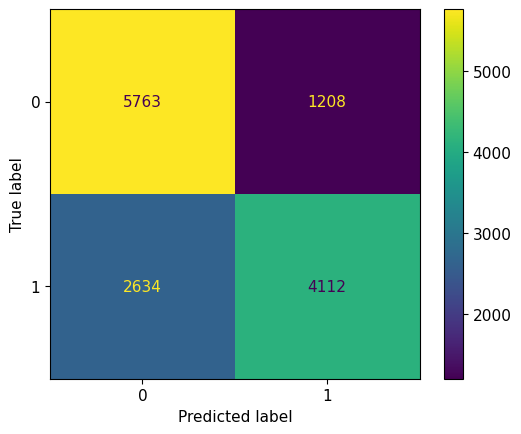

In [62]:
print('Accuracy =', qdaFSS_results[0])  
print('Sensitivity (TPR) =', qdaFSS_results[5])

print('\n Confusion matrix \n \n')
print(qdaFSS_results[1])

plot_confusion_matrix(qdaFSS_results[2], qdaFSS_results[3], qdaFSS_results[4])
plt.show()

In [ ]:
viewer_mode = True
rndF_classifiers = []
if viewer_mode:
    n_ests = [2,5,10,50,100,200,300,400,500,750,1000]
    for n_est in n_ests: # add append to dict like knn
        rndF_classifiers.append(RandomForestClassifier(n_estimators=500, max_depth=20, max_features='sqrt', max_leaf_nodes=n_est))

    acc_list = []
    tpr_list = []
    report_list = []
    true_positive = []
    true_negative = []

    for clf in rndF_classifiers: 
        clf.fit(X_train,y_train)

    y_predict = clf.predict(X_test)
    y_predicted = np.array(y_predict > 0.5, dtype=float)

    rndForest_acc = accuracy_score(y_test, y_predicted)
    cm = confusion_matrix(y_test, y_predicted)
    rndForest_tpr = cm[1][1] /(cm[1][0] + cm[1][1])
    rndForest_report = classification_report(y_test, y_predicted)

    acc_list.append(rndForest_acc)
    tpr_list.append(rndForest_tpr)
    report_list.append(rndForest_report)
    true_positive.append(cm[1][1])
    true_negative.append(cm[0][0])

    plt.figure(figsize=(15, 7))
    ax = ax
    score_list = np.array(acc_list)
    score_list_plot = score_list * 100
    true_positive_plot = np.array(true_positive)/sum(y_test) * 100
    true_negative_plot = np.array(true_negative)/(len(y_test)-sum(y_test)) * 100
    plt.plot(n_ests, score_list_plot,  'r-')
    plt.plot(n_ests, true_positive_plot, 'b:')
    plt.plot(n_ests, true_negative_plot, 'g:')
    plt.scatter(n_ests, score_list_plot)
    plt.scatter(n_ests, true_positive_plot)
    plt.scatter(n_ests, true_negative_plot)
for x,y in zip(n_ests,score_list_plot):

            label = "{:.2f}".format(y)

            plt.annotate(str(round(y, 2)), # this is the text
                  (x,y), # these are the coordinates to position the label
                  textcoords="offset points", # how to position the text
                  xytext=(0,10), # distance from text to points (x,y)
                  ha='center')

            plt.ylim(min(score_list_plot)* 0.9, max(score_list_plot)*1.1)
            plt.xlabel('Max Leaf Nodes')
            plt.ylabel('Score [%]')
            plt.title('RND Forest Classifier')
            plt.legend(['Accuracy', 'Sensitivity', 'Specificity'])
            plt.grid(True)
            plt.show()

    

else:
     rndForestClassifier = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [500], 'max_features':['sqrt'], 'max_depth':[20], 'max_leaf_nodes':[500, 1000, 1500]}, cv=5, scoring=['accuracy','recall'], refit='accuracy').fit(X_train, y_train)
print(rndForestClassifier.best_estimator_)
param_selection = rndForestClassifier.cv_results_['params']
test_scores = rndForestClassifier.cv_results_['mean_test_score']
for i in param_selection:
    print(i)
    print(test_scores)

In [90]:
viewer_mode = True
if viewer_mode:
    print("Support Vector Classifier takes very long.")
else:
    C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
            svm.SVC(kernel='rbf', gamma=0.7, C=C),
            svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))


    accuracy_svc = []
    for clf in models: 
        clf.fit(X_train_scaled, y_train_scaled)
        y_pred = clf.predict(X_test_scaled)
        accuracy_svc.append(accuracy_score(y_test_scaled, y_pred))
        print(f"Accuracy: ",  accuracy_score(y_test_scaled, y_pred)) 

Support Vector Classifier takes very long.


In [94]:
if viewer_mode:
    max_accuracy_svc=0.734126
    true_positive_svc=0.660243 	
    print('Support Vector Classifier with highest accuracy: Polynomial')
    print('Accuracy =', max_accuracy_svc) 
    print('Sensitivity (TPR) =', true_positive_svc)
else:
    svc_clf_list = ['Linear', 'Radial Basis Function', 'Polynomial']

    max_accuracy_svc = max(accuracy_svc)
    max_svc_index = np.argmax(accuracy_svc)

    svc_clf = models[max_svc_index]
    svc_clf.fit(X_train_scaled, y_train_scaled)
    y_predict = svc_clf.predict(X_test_scaled)
    svc_report = classification_report(y_test, y_predict)

    cm_svc = confusion_matrix(y_test, y_predict)

    true_positive_svc = cm_svc[1][1]/sum(y_test)

    print('Accuracy =', max_accuracy_svc) 
    print('Sensitivity (TPR) =', true_positive_svc)
    print('Support Vector Classifier with highest accuracy:', svc_clf_list[max_svc_index]) 

    print('\n Confusion matrix \n \n')
    plot_confusion_matrix(svc_clf, X_test_scaled, y_test_scaled)
    plt.show()

Support Vector Classifier with highest accuracy: Polynomial
Accuracy = 0.734126
Sensitivity (TPR) = 0.660243


In [95]:
tpr_weight = 0.25
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear Discriminant analysis', 'Decision Tree', 
              'GradientBoostingClassifier', ' Nearest Neighbor', 'QDA', 'Random Forest', 'Support Vector Classifier'],
    'Accuracy': [logreg_acc, lda_acc, dtree_tuned_acc, boosting_acc, accuracy_KNN, qdaFSS_results[0], rndForest_acc, max_accuracy_svc],
                    
    'Sensitivity' : [tpr_logreg,tpr_lda,tpr_dree_tuned,tpr_boost,true_positive_KNN, qdaFSS_results[5], rndForest_tpr, true_positive_svc],
    'Objective Value' : [logreg_acc + tpr_logreg*tpr_weight, lda_acc+tpr_lda*tpr_weight, dtree_tuned_acc+tpr_dree_tuned*tpr_weight,
                         boosting_acc+tpr_boost*tpr_weight, accuracy_KNN+true_positive_KNN*tpr_weight, 
                         qdaFSS_results[0]+qdaFSS_results[5]*tpr_weight, rndForest_acc+rndForest_tpr*tpr_weight,
                         max_accuracy_svc+true_positive_svc*tpr_weight] })

models

,Model,Accuracy,Sensitivity,Objective Value
0,Logistic Regression,0.730189,0.674918,0.898918
1,Linear Discriminant analysis,0.726762,0.666617,0.893417
2,Decision Tree,0.737406,0.681589,0.907803
3,GradientBoostingClassifier,0.736458,0.695079,0.910228
4,Nearest Neighbor,0.736677,0.676994,0.905926
5,QDA,0.719910,0.588793,0.867108
6,Random Forest,0.735365,0.694041,0.908875
7,Support Vector Classifier,0.734126,0.660243,0.899187


In [96]:
df_plotting = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear Discriminant analysis', 'Decision Tree', 
              'GradientBoostingClassifier', ' Nearest Neighbor', 'QDA', 'Random Forest', 'Support Vector Classifier', 
              'Logistic Regression', 'Linear Discriminant analysis', 'Decision Tree', 
              'GradientBoostingClassifier', ' Nearest Neighbor', 'QDA', 'Random Forest', 'Support Vector Classifier'],
    'Values': [logreg_acc, lda_acc, dtree_tuned_acc, boosting_acc, accuracy_KNN, qdaFSS_results[0], rndForest_acc, max_accuracy_svc,
             tpr_logreg,tpr_lda,tpr_dree_tuned,tpr_boost,true_positive_KNN, qdaFSS_results[5], rndForest_tpr, true_positive_svc],
    'Type': ['Accuracy', 'Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','Accuracy','Accuracy', 
             'Sensitivity', 'Sensitivity', 'Sensitivity', 'Sensitivity', 'Sensitivity', 'Sensitivity', 'Sensitivity', 'Sensitivity']})

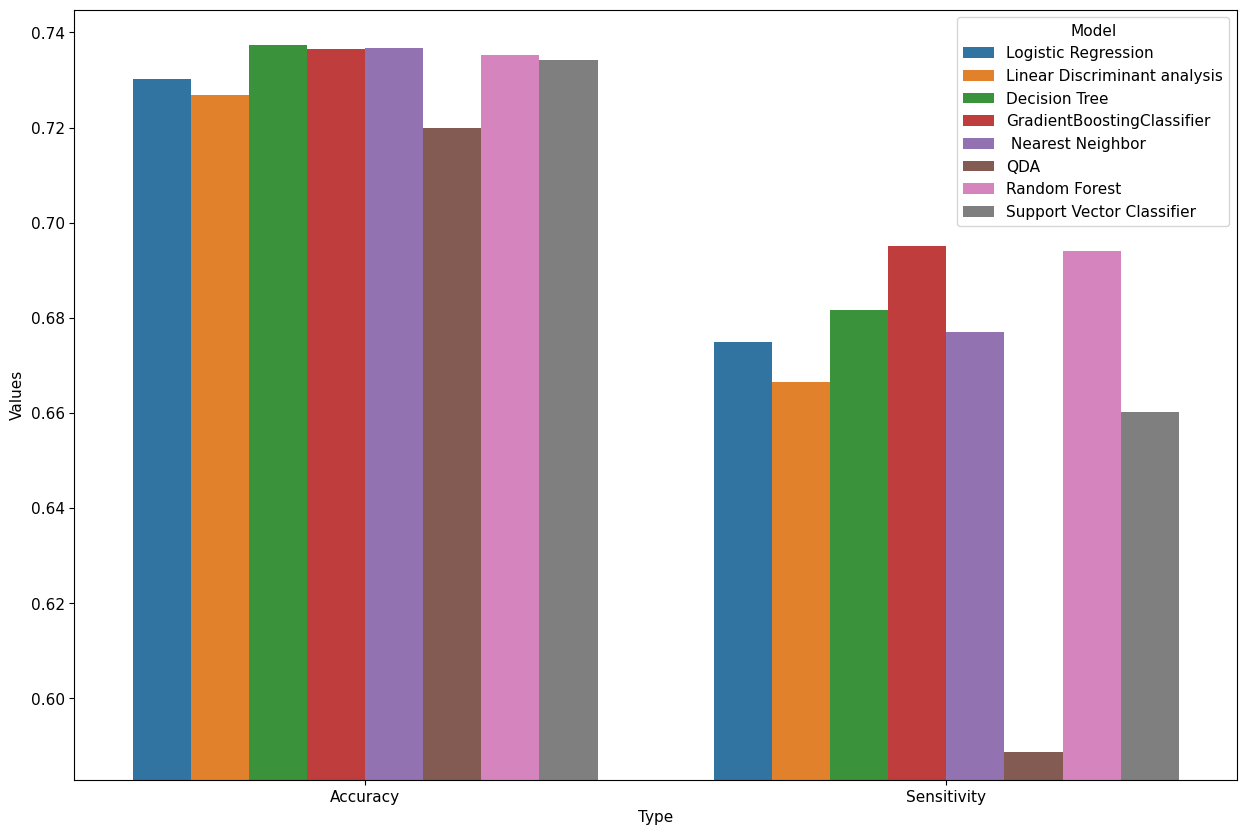

In [97]:
plt.figure(figsize=(15,10))
sns.barplot(y=df_plotting['Values'],x=df_plotting['Type'], hue=df_plotting['Model'], orient ="v")
plt.ylim(min(df_plotting['Values'])* 0.99, max(df_plotting['Values'])*1.01)
plt.show()

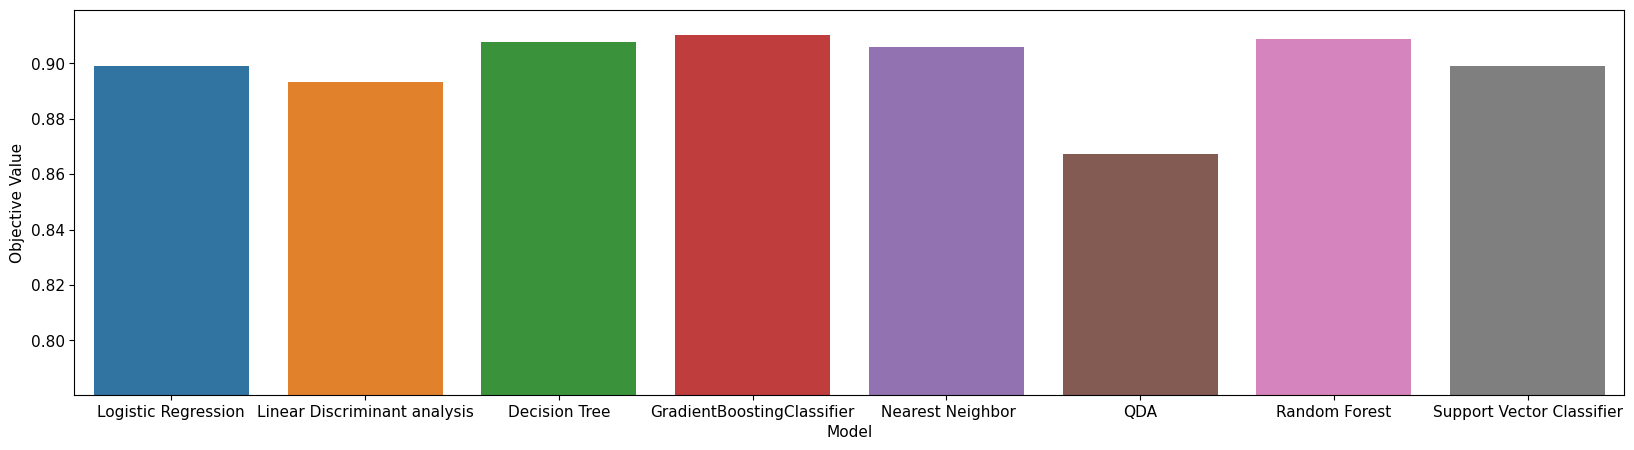

In [98]:
plt.figure(figsize=(20,5))
sns.barplot(y=models['Objective Value'],x=models['Model'], orient ="v")
plt.ylim(min(models['Objective Value'])* 0.9, max(models['Objective Value'])*1.01)
plt.show()